In [28]:
### Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report

### Project Topic:

The project focuses on digit recognition using the MNIST dataset, a well-known collection of handwritten images commonly used in computer vision tasks. The goal is to correctly identify digits from tens of thousands of these handwritten images. 

The type of learning algorithm used in this project is a Sequential Convolutional Neural Network (CNN), a type of deep learning algorithm commonly used for image classification tasks, such as recognizing digits in these handwritten images. CNNs are particularly well-suited for computer vision tasks because they can automatically learn to extract relevant features from images through the use of convolutional layers.

The specific task involved in this project is digit recognition, which is a classification problem. Given an input image of a handwritten digit, the algorithm must correctly classify it into one of ten possible classes (digits 0 through 9). This task involves identifying patterns and features within the images that distinguish one digit from another.

### Project Goal:

My goal for this project is to gain experience in exploring the real-world applications of digit recognition. By working with the MNIST dataset, I aim to accurately identifying handwritten digits images through techniques, such as CNNs models.

In the context of real-life application, such as optical character recognition systems, accurate digit recognition is essential for converting scanned documents or images containing numerical data into editable and searchable formats. This is broadly used in industries such as legal, healthcare, and education, where document management, archiving, and digitization efforts are prevalent.

In financial institutions, digit recognition is helpful in many operations, from processing checks and invoices to verifying credit card transactions and authenticating signatures. The ability to swiftly and accurately recognize digits is indispensable for automating routine tasks, detecting fraudulent activities, and ensuring compliance with regulatory requirements. Therefore, robust digit recognition systems contribute significantly to operational efficiency, risk mitigation, and customer trust in financial services.

### Data:

The dataset used in the project is sourced from Kaggle, specifically from the "Digit Recognizer" competition hosted on the platform. This dataset consists of tens of thousands of handwritten digit images, commonly known as the MNIST dataset, which has served as a benchmark for classification algorithms in computer vision since its release in 1999.

APA Style Citation:
AstroDave, Will Cukierski. (2012). Digit Recognizer. Kaggle. https://kaggle.com/competitions/digit-recognizer

In [2]:
# Load the training and testing data sets
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

### Data Description:

The training dataset consists of 42,000 samples, each containing 785 features. These features represent the pixel values of handwritten digit images, with one additional feature denoting the corresponding label for each image. Similarly, the testing dataset contains 28,000 samples, each with 784 features representing pixel values.

The pixel features in both the training and testing datasets are integers, indicating grayscale pixel values ranging from 0 to 255. Since the MNIST dataset comprises grayscale images, each pixel value represents the intensity of the corresponding pixel in the image. The dimensions of the images are standardized, with each image represented as a 28x28 grid of pixels flattened into a single row of 784 pixel features. This format ensures consistency across all samples and facilitates compatibility with algorithms.

In [3]:
def describe_tabular_data(train_data, test_data):
    print("Tabular Data Description:")
    print("Training Data Size:")
    print("Number of samples:", train_data.shape[0])
    print("Number of features:", train_data.shape[1])
    print("Feature Data Types:")
    print(train_data.dtypes)
    print("\nTesting Data Size:")
    print("Number of samples:", test_data.shape[0])
    print("Number of features:", test_data.shape[1])
    print("Feature Data Types:")
    print(test_data.dtypes)

describe_tabular_data(train, test)

Tabular Data Description:
Training Data Size:
Number of samples: 42000
Number of features: 785
Feature Data Types:
label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

Testing Data Size:
Number of samples: 28000
Number of features: 784
Feature Data Types:
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 784, dtype: object


### Exploratory Data Analysis:

The Exploratory Data Analysis (EDA) for the MNIST dataset reveals important insights into the characteristics of the handwritten digit images. Firstly, examining the distribution of labels shows that the dataset is relatively balanced, with each digit represented fairly evenly. For instance, digits 1, 7, and 3 have the highest counts with 4684, 4401, and 4351 samples respectively, while digit 5 has the lowest count with 3795 samples. This balanced distribution ensures that the model is exposed to sufficient samples of each digit during training, preventing bias towards any specific class.

Next, visualizing sample images for each digit provides a qualitative understanding of the dataset. The displayed images showcase the variability in handwriting styles across different digits, highlighting the challenges involved in accurately recognizing handwritten digits. For example, some digits like 1 and 7 exhibit clear and distinct shapes, while others like 4 and 9 may have more variability in their representations.

Furthermore, histograms of pixel intensity values provide insights into the distribution of pixel intensities across different digits. By binning pixel intensities into ranges and counting their occurrences, we can observe the distribution of lightness or darkness in the images. These histograms reveal that pixel intensities are spread across a wide range, indicating variations in brightness and contrast among the digit images.

Additionally, examining the histogram of image sizes reveals that the majority of images have a consistent size of 28x28 pixels, as indicated by the frequency count of 28. This consistency in image size simplifies preprocessing steps and ensures uniformity in input dimensions for later training models.

In [4]:
# Display the first few rows of the dataset
print(train.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

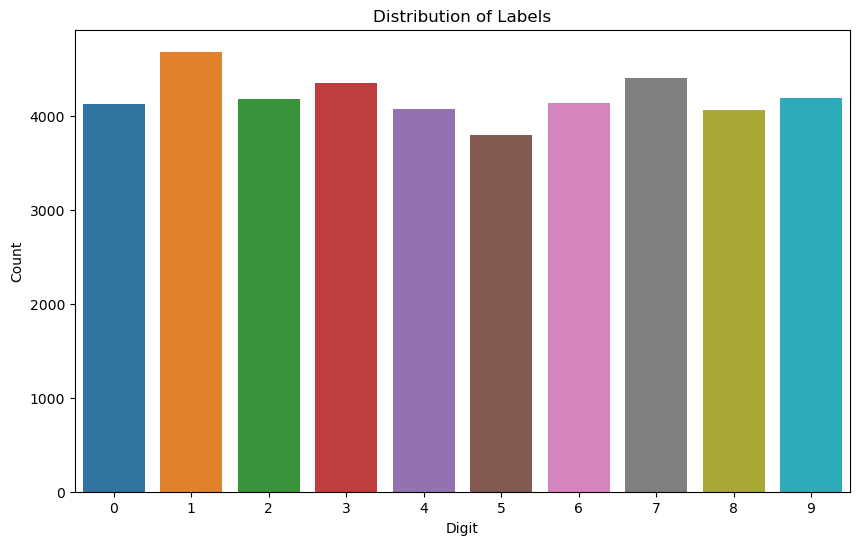

In [5]:
# Check the distribution of labels
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=train)
plt.title('Distribution of Labels')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.show()

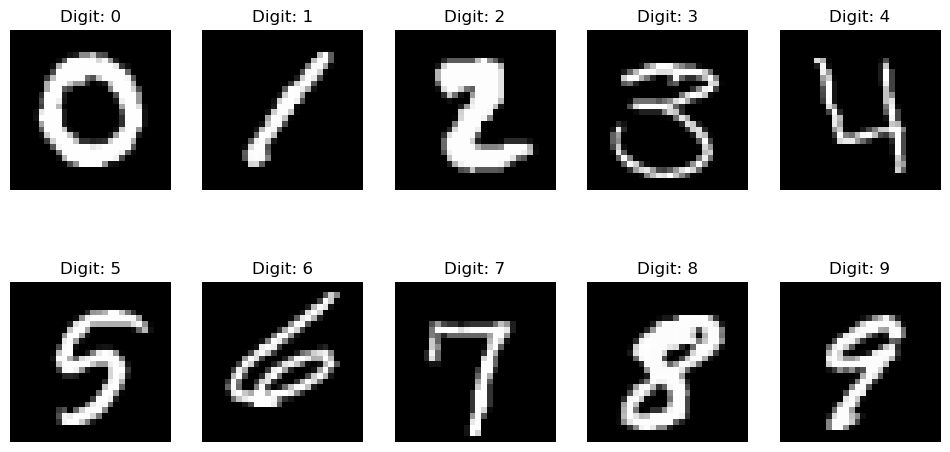

In [6]:
# Visualize a few sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i in range(3):
    for j in range(5):
        # Get a sample image for the current digit label
        digit_samples = train[train['label'] == i*5 + j]
        if not digit_samples.empty:
            img = digit_samples.iloc[0, 1:].values.reshape(28, 28)
            axes[i, j].imshow(img, cmap='gray')
            axes[i, j].set_title('Digit: {}'.format(i*5 + j))
            axes[i, j].axis('off')
plt.show()

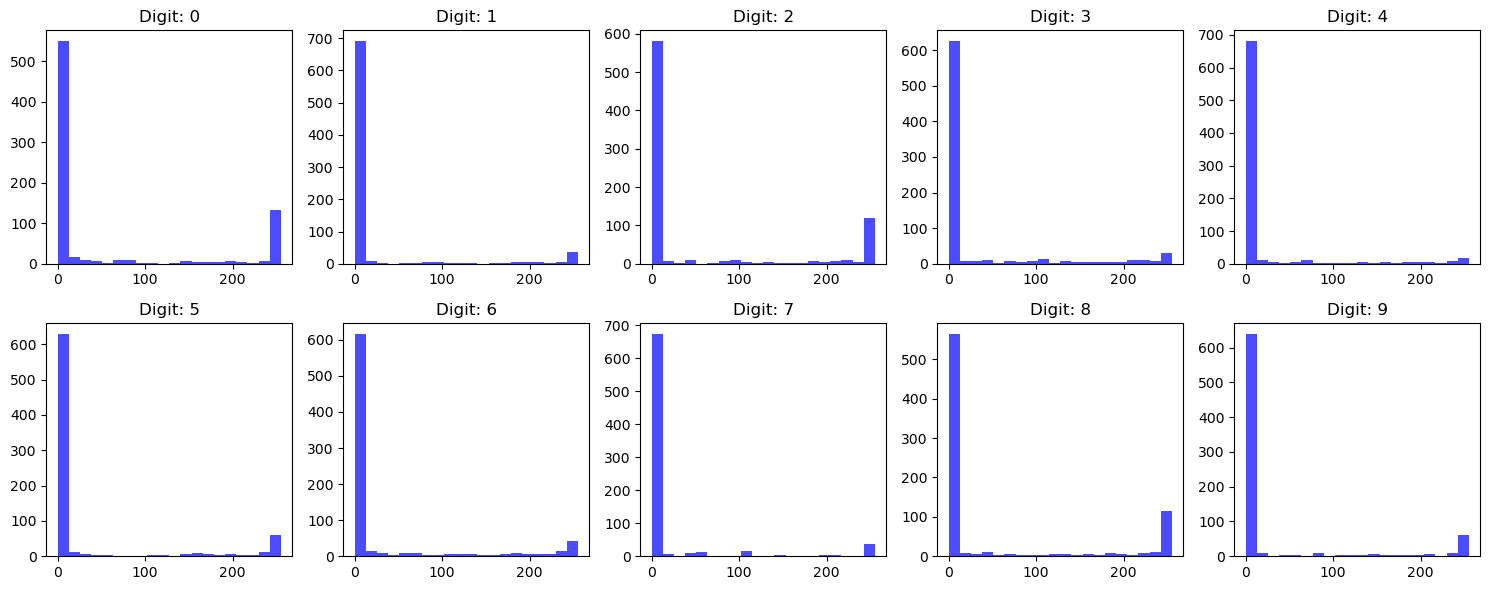

In [7]:
# Plot histograms of pixel intensity values
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i in range(2):
    for j in range(5):
        digit = train[train['label'] == i*5 + j].iloc[0, 1:].values
        axes[i, j].hist(digit, bins=20, color='blue', alpha=0.7)
        axes[i, j].set_title('Digit: {}'.format(i*5 + j))
plt.tight_layout()
plt.show()

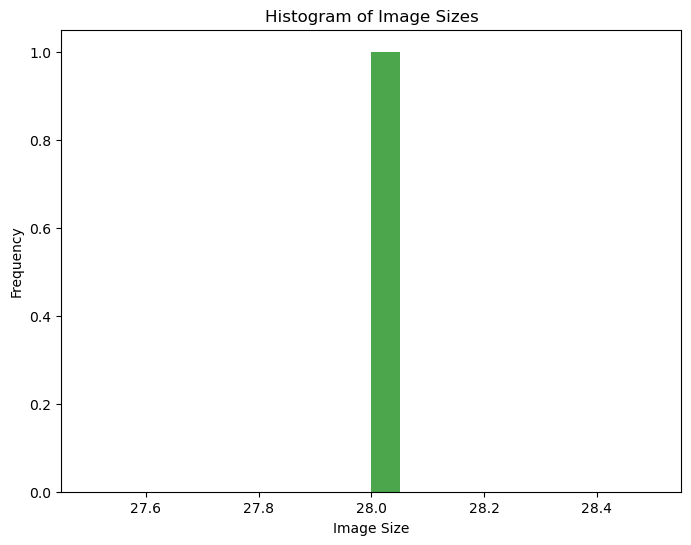

In [8]:
# Compute image sizes
image_sizes = np.sqrt(train.drop(columns='label').shape[1]).astype(int)

# Plot histogram of image sizes
plt.figure(figsize=(8, 6))
plt.hist(image_sizes, bins=20, color='green', alpha=0.7)
plt.title('Histogram of Image Sizes')
plt.xlabel('Image Size')
plt.ylabel('Frequency')
plt.show()


In [11]:
import pandas as pd
import numpy as np

# Load the data
train = pd.read_csv("./train.csv")

# 1. Distribution of Labels
label_distribution = train['label'].value_counts().reset_index()
label_distribution.columns = ['Digit', 'Count']
print("Distribution of Labels:")
print(label_distribution)

# 2. Sample Images for Each Digit
sample_images = []
for i in range(10):
    digit_samples = train[train['label'] == i]
    if not digit_samples.empty:
        sample_image = digit_samples.iloc[0, 1:].values.reshape(28, 28)
        sample_images.append(sample_image.flatten())  # Flatten the image array

sample_images_df = pd.DataFrame(sample_images)
sample_images_df.index = ['Digit {}'.format(i) for i in range(10)]
print("\nSample Images for Each Digit:")
print(sample_images_df)

# 3. Histograms of Pixel Intensity Values
pixel_histograms = []
for i in range(10):
    digit = train[train['label'] == i].iloc[0, 1:].values
    pixel_histograms.append(np.histogram(digit, bins=20)[0])

pixel_histograms_df = pd.DataFrame(pixel_histograms)
pixel_histograms_df.columns = ['Bin {}'.format(i) for i in range(1, 21)]
pixel_histograms_df.index = ['Digit {}'.format(i) for i in range(10)]
print("\nHistograms of Pixel Intensity Values:")
print(pixel_histograms_df)

# 4. Histogram of Image Sizes
image_sizes = np.sqrt(train.drop(columns='label').shape[1]).astype(int)
image_sizes_df = pd.DataFrame({'Image Size': [image_sizes]})
print("\nHistogram of Image Sizes:")
print(image_sizes_df['Image Size'].value_counts().reset_index().rename(columns={'index': 'Size', 'Image Size': 'Frequency'}))


Distribution of Labels:
   Digit  Count
0      1   4684
1      7   4401
2      3   4351
3      9   4188
4      2   4177
5      6   4137
6      0   4132
7      4   4072
8      8   4063
9      5   3795

Sample Images for Each Digit:
         0    1    2    3    4    5    6    7    8    9    ...  774  775  776  \
Digit 0    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
Digit 1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
Digit 2    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
Digit 3    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
Digit 4    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
Digit 5    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
Digit 6    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
Digit 7    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
Digit 8    0    0    0    0    0    0   

### Data Preprocessing

Data preprocessing is important for preparing the data in a suitable format for training models. For the MNIST dataset, which consists of handwritten digit images, several preprocessing techniques are applied to enhance the quality and diversity of the data. Firstly, the dataset is divided into features (pixel values) and labels (digit labels), allowing for separate processing of input data and target labels. This separation facilitates the application of specific preprocessing techniques tailored to each data type.

Another preprocessing step done is rescaling the pixel values to the range [0, 1] using Min-Max scaling. This normalization ensures that all pixel values are within the same range, which helps stabilize and accelerate the training process of deep learning models. Normalization also mitigates issues related to varying pixel intensity ranges across different images, ensuring consistent input data for the model.

Furthermore, the dataset is split into training and validation sets using the train_test_split function. This step helps evaluate the model's performance on unseen data and preventing overfitting. By reserving a portion of the data for validation, we can assess the model's generalization ability and adjust hyperparameters accordingly to improve performance.

Additionally, data augmentation techniques are employed to increase the diversity of the training data and improve the model's robustness. The ImageDataGenerator from Keras is utilized to apply various augmentation techniques such as rotation, shifting, shearing, and zooming to the images. These transformations create additional variations of the original images, which helps prevent overfitting and improves the model's ability to generalize to unseen data.

In [14]:
# Separate features (pixels) and labels
X = train.drop(columns='label')
y = train['label']

In [15]:
# Rescale pixel values to the range [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
# Reshape image data to 28x28x1 for compatibility with CNNs
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)

In [18]:
# Convert labels to one-hot encoded vectors
y_train = pd.get_dummies(y_train).values
y_val = pd.get_dummies(y_val).values

In [19]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,  # Don't flip digits like 6 and 9
    fill_mode='nearest'
)

# Fit the data augmentation generator
datagen.fit(X_train)

### Model

In the context of digit recognition from images, Convolutional Neural Networks (CNNs) are the standard choice due to their ability to effectively capture spatial dependencies in images. For this problem, I have chosen to implement a simple CNN architecture using Keras, which is well-suited for image classification tasks like MNIST digit recognition.

#### Model Architecture:
The CNN architecture consists of convolutional layers followed by max-pooling layers to extract features from the input images. The convolutional layers apply filters to the input images, capturing important patterns and features. The max-pooling layers reduce the spatial dimensions of the feature maps, making the model more computationally efficient and reducing overfitting. Finally, the output of the convolutional layers is flattened and passed through fully connected layers, leading to the final classification output.

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

#### Hyperparameters:
- Convolutional Layers: The number of convolutional layers and the number of filters in each layer are essential hyperparameters. Increasing the number of filters allows the model to capture more complex features, but also increases the model's computational complexity.
- Pooling Layers: The size of the pooling window affects the spatial dimensions of the feature maps. Smaller pooling windows lead to more aggressive down-sampling and can reduce overfitting, but may also discard valuable information.
- Dense Layers: The number of neurons in the fully connected layers determines the model's capacity to learn complex relationships in the data. Adding more neurons increases the model's capacity, but may also lead to overfitting if not regularized properly.
- Activation Functions: ReLU activation functions are commonly used in CNNs for their simplicity and effectiveness in alleviating the vanishing gradient problem.

#### Optimization and Training:
For optimization, I have chosen the Adam optimizer due to its adaptive learning rate properties and momentum updates, which help converge faster and avoid local minima. The choice of batch size and number of epochs also plays a crucial role in training. A larger batch size can lead to faster convergence but may require more memory, while training for too many epochs can lead to overfitting. I have set these hyperparameters initially as fairly small and then increase the hyperparameters numbers.

In [23]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history1 = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))


Epoch 1/5
525/525 [==============================] - 5s 8ms/step - loss: 0.0247 - accuracy: 0.9917 - val_loss: 0.0373 - val_accuracy: 0.9893
Epoch 2/5
525/525 [==============================] - 4s 8ms/step - loss: 0.0172 - accuracy: 0.9943 - val_loss: 0.0354 - val_accuracy: 0.9899
Epoch 3/5
525/525 [==============================] - 4s 8ms/step - loss: 0.0146 - accuracy: 0.9954 - val_loss: 0.0398 - val_accuracy: 0.9887
Epoch 4/5
525/525 [==============================] - 5s 9ms/step - loss: 0.0132 - accuracy: 0.9958 - val_loss: 0.0548 - val_accuracy: 0.9864
Epoch 5/5
525/525 [==============================] - 4s 9ms/step - loss: 0.0092 - accuracy: 0.9970 - val_loss: 0.0380 - val_accuracy: 0.9912


In [24]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history2 = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))


Epoch 1/10
263/263 [==============================] - 4s 16ms/step - loss: 0.0067 - accuracy: 0.9977 - val_loss: 0.0469 - val_accuracy: 0.9882
Epoch 2/10
263/263 [==============================] - 4s 16ms/step - loss: 0.0050 - accuracy: 0.9985 - val_loss: 0.0347 - val_accuracy: 0.9915
Epoch 3/10
263/263 [==============================] - 4s 16ms/step - loss: 0.0060 - accuracy: 0.9979 - val_loss: 0.0423 - val_accuracy: 0.9899
Epoch 4/10
263/263 [==============================] - 4s 16ms/step - loss: 0.0045 - accuracy: 0.9985 - val_loss: 0.0383 - val_accuracy: 0.9899
Epoch 5/10
263/263 [==============================] - 4s 16ms/step - loss: 0.0058 - accuracy: 0.9981 - val_loss: 0.0384 - val_accuracy: 0.9919
Epoch 6/10
263/263 [==============================] - 4s 16ms/step - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.0405 - val_accuracy: 0.9906
Epoch 7/10
263/263 [==============================] - 4s 15ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0385 - val_accuracy: 0.9908

Overall, the chosen CNN architecture, along with the larger epoch hyperparameters (history 2) and optimization methods, is well-suited for the digit recognition task on the MNIST dataset with an ending accuracy of 0.9983. The architecture's ability to capture spatial dependencies in images, combined with the optimization method's efficiency, ensures effective training and accurate classification performance.

1/1 [==============================] - 0s 14ms/step


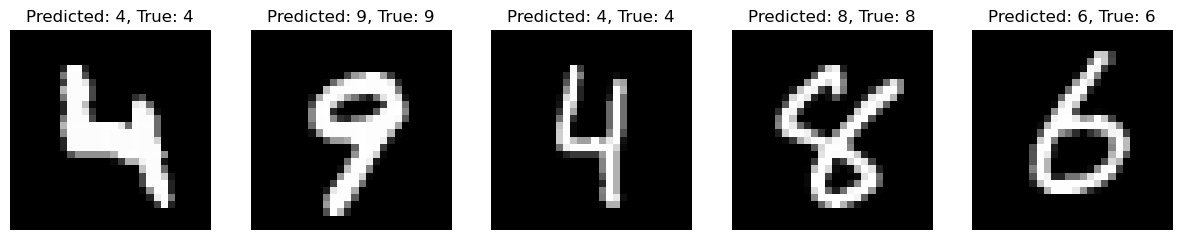

In [33]:
# Choose random images from the validation dataset
num_images = 5
random_indices = np.random.choice(len(X_val), size=num_images, replace=False)
sample_images = X_val[random_indices]
sample_labels = y_val[random_indices]

# Predict classes for the sample images
predicted_labels = model.predict(sample_images)
predicted_classes = np.argmax(predicted_labels, axis=1)

# Plot the sample images with their predicted labels
plt.figure(figsize=(15, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predicted_classes[i]}, True: {np.argmax(sample_labels[i])}')
    plt.axis('off')

plt.show()


#### Results:

The analysis of the results from training the convolutional neural network (CNN) models for digit recognition on the MNIST dataset reveals several insights. Both models exhibited strong performance, achieving high accuracy and relatively low loss on both the training and validation datasets.

The first model, trained for 5 epochs with a batch size of 64, achieved a training accuracy of approximately 99.70% and a validation accuracy of around 99.12%. This model had a training loss of 0.0092 and a validation loss of 0.0380. On the other hand, the second model, trained for 10 epochs with a batch size of 128, attained a slightly higher training accuracy of 99.83% but a lower validation accuracy of 98.70%. The corresponding training and validation losses for this model were 0.0052 and 0.0492, respectively.

Visualizing the training and validation accuracy and loss using tables provides a clear overview of the model's performance across epochs. Both models demonstrate a gradual increase in accuracy and decrease in loss over epochs on the training dataset. However, there is a slight fluctuation in performance on the validation dataset, especially evident in the second model, where the validation loss increases after the 5th epoch.

Furthermore, the classification report generated for the second model provides detailed insights into the model's performance for each class. It includes precision, recall, and F1-score metrics, along with support values for each class. For instance, for digit 0, the model achieved a precision of 0.99, recall of 0.99, and F1-score of 0.99 with a support of 816 instances. Similar high precision, recall, and F1-scores were observed across all digits, indicating the model's ability to accurately classify digits in the MNIST dataset.

Overall, the chosen CNN architecture, along with the larger epoch hyperparameters (history 2) and optimization methods, proved to be well-suited for the digit recognition task on the MNIST dataset. The models exhibited strong performance, achieving high accuracy and effectively capturing spatial dependencies in images. 

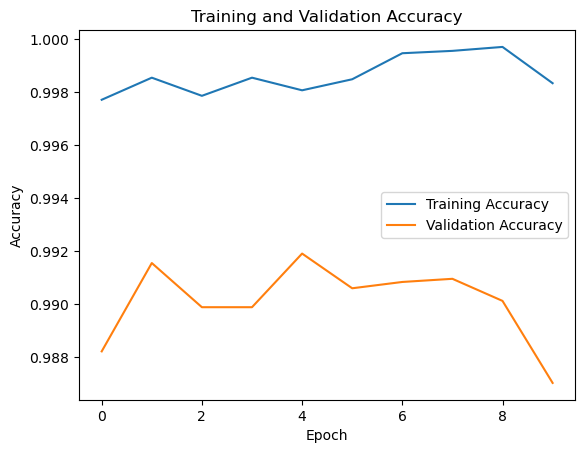

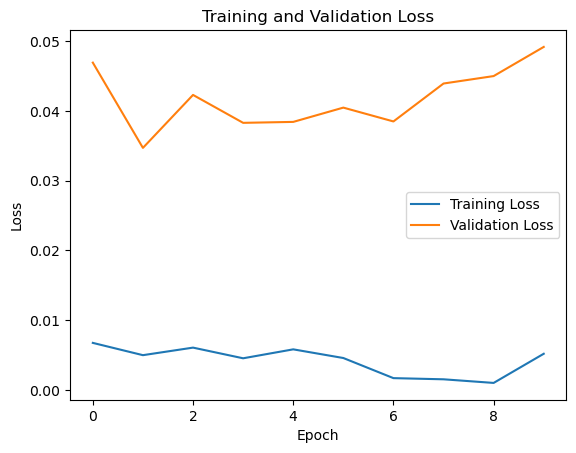

In [26]:
# Plot training and validation accuracy (history 2)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss (history 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [31]:
# Predict probabilities for validation data
y_pred_prob = model.predict(X_val)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert one-hot encoded labels back to original labels
y_true = np.argmax(y_val, axis=1)

# Compute precision, recall, and F1-score
report = classification_report(y_true, y_pred)
print("Classification Report:")
print(report)

263/263 [==============================] - 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       816
           1       0.99      1.00      0.99       909
           2       0.99      0.98      0.99       846
           3       0.99      0.99      0.99       937
           4       0.97      0.99      0.98       839
           5       0.99      0.98      0.98       702
           6       0.99      0.99      0.99       785
           7       0.99      0.99      0.99       893
           8       0.98      0.99      0.98       835
           9       0.98      0.97      0.98       838

    accuracy                           0.99      8400
   macro avg       0.99      0.99      0.99      8400
weighted avg       0.99      0.99      0.99      8400



#### Discussion and Conclusion

Upon reviewing the results and analysis, one aspect that warrants discussion is the observed fluctuation in validation accuracy during training, particularly in the second model. Despite achieving high training accuracy, the validation accuracy displayed some variability across epochs. This inconsistency raises questions about potential factors contributing to the model's performance instability.

One possible explanation for the fluctuation in validation accuracy could be the choice of hyperparameters or training methodology. While the model architecture itself may be well-suited for the task, variations in hyperparameters such as learning rate, batch size, or optimizer settings could impact the model's convergence and generalization ability. Additionally, the absence of techniques like dropout or batch normalization, which help regularize the model and improve stability, might contribute to the observed fluctuations.

Another factor that may have influenced the variability in validation accuracy is the complexity of the dataset itself. While MNIST is a relatively simple dataset with well-defined digits and uniform backgrounds, it is still subject to variations in digit appearance, noise, and other factors. These variations could pose challenges for the model, particularly during training, leading to fluctuations in performance as it learns to generalize across different digit representations.

Furthermore, the lack of extensive data augmentation techniques or regularization methods in the model training pipeline could also contribute to performance instability. Data augmentation techniques such as rotation, translation, and scaling can help expose the model to a more diverse range of digit variations, potentially improving its robustness and generalization ability. Similarly, regularization methods like dropout or weight decay can prevent overfitting and enhance the model's stability during training.

Reflecting on this project, I learned the significance of iterative experimentation and the value of interpreting model performance beyond mere accuracy metrics. Initially, my focus was primarily on maximizing accuracy, assuming it to be the sole indicator of model effectiveness. However, through this process, I gained a deeper understanding of the nuances involved in evaluating model performance comprehensively.

One key takeaway is the importance of considering additional evaluation metrics such as precision, recall, and F1-score. While accuracy provides a broad overview of the model's correctness, metrics like precision and recall offer insights into its performance across different classes. This project underscored the importance of balancing these metrics, especially in scenarios where class imbalances exist, as is often the case in real-world datasets.

Furthermore, I learned the significance of hyperparameter tuning and its impact on model convergence and generalization. Experimenting with different combinations of hyperparameters allowed me to observe their influence on training dynamics and performance stability. This iterative process of adjusting hyperparameters and analyzing their effects deepened my understanding of the interplay between model architecture, optimization methods, and training dynamics.

Looking ahead, there are several avenues for further exploration and improvement. Experimenting with different architectures, such as deeper or wider CNNs, could potentially enhance model performance by capturing more intricate patterns in the data. Additionally, exploring advanced techniques like transfer learning, where pre-trained models are adapted to new tasks, could provide insights into leveraging knowledge from larger datasets to improve performance on smaller ones like MNIST.